In [244]:
import pandas as pd 
import numpy as np 
import tensorly as tl
import plotly.express as px
import plotly.io as pio
import os 
import datetime


pio.renderers.default = "notebook_connected"

In [245]:
def read_ticker(ticker) : 
    filename = ticker
    csv = pd.read_csv(filename)
    return csv 


# def calc_momentum(df):

    

In [246]:
tickers = ['BAC','KO','UNH','BRK.B','NVDA','V', 'DIS','PFE']
# tickers = ['AAPL']
df_tickers = []
N = 12 # group by 12 rows
YEARS = np.arange(2021,2009,-1)
print(YEARS)
PATH = os.getcwd()
for ticker in tickers : 
    path = os.path.join(PATH,'EQUITIES', ticker+'.xlsx')
    df = pd.read_excel(path,skiprows=6)
    # df = df[:-1]  #skip last row 
    df.drop([0],inplace=True) #delete the first row
    df_tickers.append(df)


bond_names = ['us_3_month','us_6_month','us_12_month','us_2_year','us_5_year','us_10_year','us_30_year']


df_bonds = []
for bond in bond_names : 
    path = os.path.join(PATH,'BONDS', bond+'.xlsx')
    df = pd.read_excel(path,skiprows=5)
    # df = df[:-1]
    df.drop([0],inplace=True)
    df_bonds.append(df)



[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]


## Add momentum to equities and plot it 


In [247]:
def generate_momentum_data(list_df, list_names) : 
    mom_df = pd.DataFrame()
    price_df = pd.DataFrame()
    for df,ticker in zip(list_df,list_names) : 
        df = df.reset_index()
        returns = ((df['PX_LAST'] - df['PX_LAST'].shift(-1))  /  df['PX_LAST'].shift(-1) * 100)
        mom_df[ticker] = returns.groupby(returns.index // N).sum()
        price_df[ticker] = df['PX_LAST']
    
    price_df.index = df['Date']
    mom_df = mom_df[:-1]
    return mom_df, price_df

def generate_price_plots(price_df) : 
    fig = px.line(np.log(price_df))
    fig.show()

def generate_momentum_plots(mom_df, str_asset) : 
    fig = px.histogram(mom_df,barmode='group')

    fig.update_layout(
        title = 'Momentum', # adding the title 
        xaxis_title = 'Momentum (%)', # title for x axis 
        yaxis_title = 'Number of occurences', # title for y axis 
        xaxis = dict(           # attribures for x axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',
            range = [-50, 160]

        ),
        yaxis = dict(           # attribures for y axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',
        ),
    )

    fig.show()


    bins = [-300,0,300]
    binned_mom_df = pd.DataFrame()
    for column in mom_df.columns :
        str = column
        binned_mom_df[str] = pd.cut(mom_df[column],bins,labels = ['Negative', 'Positive'])

    fig = px.histogram(binned_mom_df,barmode = 'group')

    fig.update_xaxes(categoryorder='array', categoryarray= ['Negative', 'Positive'])

    fig.update_layout(
        title = 'Positive or Negative Momentum throughout 2010-2021', # adding the title 
        xaxis_title = 'Positive or Negative', # title for x axis 
        yaxis_title = 'Number of occurences', # title for y axis 
        xaxis = dict(           # attribures for x axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',

        ),
        yaxis = dict(           # attribures for y axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',
        ),
    )
    fig.show()


momentum_eq_df, price_eq_df = generate_momentum_data(df_tickers,tickers)
print(momentum_eq_df)

generate_price_plots(price_eq_df)

generate_momentum_plots(momentum_eq_df, str_asset='Equities')

# momentum_bonds_df, logged_yearly_price_bonds_df, yearly_price_bonds_df = generate_momentum_data(df_bonds,bond_names)

# generate_momentum_plots(momentum_bonds_df, yearly_price_bonds_df, str_asset='Bonds')






          BAC         KO        UNH      BRK.B        NVDA          V  \
0   42.189518  10.522602  39.544596  26.910956   92.274319   2.439540   
1   -6.804882   2.217442  20.326215   5.541696   87.566666  19.842145   
2   40.359486  16.272076  20.074649  11.641284   66.069210  36.704998   
3  -15.629367   4.440734  14.519329   4.335384  -23.299655  16.225791   
4   30.517306  10.361347  33.232857  19.974372   68.199456  38.859386   
5   35.158120  -2.941857  32.227481  22.042742  131.167654   1.530168   
6   -3.455247   2.582540  16.400166 -12.102924   54.502939  18.720665   
7   15.488908   3.692779  31.358742  24.843810   25.321580  18.040618   
8   32.214721  13.807074  34.530860  28.852125   27.544831  39.992594   
9   84.950773   4.509805   8.617735  16.586426   -9.179927  42.309284   
10 -77.533169   6.652486  35.898903  -3.757958    9.189204  37.705545   
11  -6.393676  15.531175  18.674430  22.626882    6.515540 -18.026619   

          DIS        PFE  
0  -12.932015  51.72494

## Plot the charts


In [248]:
import plotly.express as px 

momentum_eq_df = momentum_eq_df[:-1]

mean_centered_momentum_eq_df = momentum_eq_df - momentum_eq_df.mean()

mean_centered_momentum_eq_df

,BAC,KO,UNH,BRK.B,NVDA,V,DIS,PFE
0,26.057139,3.966509,13.478093,13.741146,44.151021,-22.321436,-28.658081,38.264135
1,-22.937261,-4.338651,-5.740288,-7.628114,39.443368,-4.918830,16.484964,-8.634190
2,24.227107,9.715983,-5.991854,-1.528526,17.945913,11.944022,16.194899,-22.771485
3,-31.761746,-2.115360,-11.547174,-8.834426,-71.422953,-8.535185,-12.854305,6.520021
4,14.384927,3.805253,7.166354,6.804561,20.076158,14.098410,-11.422401,-1.907623
5,19.025742,-9.497950,6.160978,8.872931,83.044356,-23.230808,-15.488842,-11.415361
6,-19.587626,-3.973554,-9.666337,-25.272735,6.379641,-6.040311,-1.359929,-8.056947
7,-0.643470,-2.863314,5.292239,11.674000,-22.801718,-6.720358,6.291735,-11.270544
8,16.082342,7.250981,8.464357,15.682315,-20.578467,15.231618,28.972458,7.804357
9,68.818394,-2.046289,-17.448768,3.416615,-57.303225,17.548308,13.806134,1.978429


In [249]:
from tensorly.decomposition import tucker, parafac, partial_tucker

In [250]:
def parafac_decomp(df, r) : 

    '''
    Input : 
    df : dataframe containing a 2D tensor ready for decomposition

    r : Value of r for the r-rank approximation




    Return  :
    reconstructed_df : Dataframe of the r-rank approximation of the tensor
    error : L1-norm error 
    
    '''
    tensor = df.to_numpy()
    weights, factors = parafac(tensor, rank=r)
    print(f"Rank = {rank}")
    print(f"Number of factors {len(factors)}")
    
    outer_prod= np.zeros(shape = np.shape(tensor))

    A = factors[0]
    B = factors[1]
    individual_ranks = []
    vs_explained = []

    for i in range(rank) :
        a = A[:,i] 
        b = B[:,i]
        outer_prod += np.outer(a,b)
        diff = (abs(df - np.outer(a,b)).values.sum() / (df.values.sum()))
        individual_ranks.append((a,b,diff))

    reconstructed_df = pd.DataFrame(outer_prod,index=df.index,columns=df.columns)
    error = np.abs((reconstructed_df - df).values.sum())
    individual_ranks = sorted(individual_ranks,key=(lambda x : x[2])) #sort by variance
    return individual_ranks, reconstructed_df, error

rank = 6 
individual_ranks, r_rank_approxed, error = parafac_decomp(momentum_eq_df,rank)

Rank = 6
Number of factors 2


Shape of original dataframe (11, 8)
Shape of factor 1 (11, 8)
Shape of core is (8, 8)
Shape of factor 2 (8, 8)
Variance explained by the first 4 eigenvector is 0.8371606215098335   
Principal components are 
             0          1          2          3          4          5  \
0  -55.909623  -6.995808  50.012541  -6.109733   2.624924  -8.258019   
1  -21.519801 -34.875067 -25.773546  -0.279603  -3.866686 -13.491741   
2  -24.642975  18.345336 -29.970758  -0.566198   6.148654   4.408901   
3   76.412018   1.441655  19.043797  18.397669  -6.615729   0.816728   
4  -23.966702   3.243641   2.363101  -9.229880  13.319194  14.089317   
5  -85.788879 -27.736364   0.506750  10.920990  -7.327835   7.552175   
6    6.616219 -23.285373 -12.429692  19.636059   7.693283  -8.116728   
7   16.957283  11.170615  -2.253155  -0.390121 -19.788975   9.469721   
8   11.039285  32.563655  -7.552890 -28.835290  -7.442022  -7.546035   
9   19.520587  90.994709   2.272318   9.206295   7.480316  -2.732351   

C:\Users\zackx\anaconda3\lib\site-packages\tensorly\tucker_tensor.py:380: RuntimeWarning:

Given only one int for 'rank' for decomposition a tensor of order 2. Using this rank for all modes.



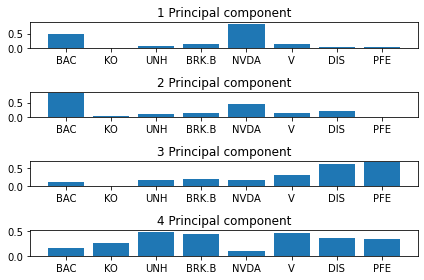

In [251]:
import matplotlib.pyplot as plt
def variance_explained(df,core,factors,number) :
    flat_core = core.flatten()
    eig_vals = flat_core[flat_core!=0]
    loadings = factors[1]
    sum_first_n_eigs = sum([abs(eig_vals[num]) for num in np.arange(0,number)])
    print(f"Variance explained by the first {number} eigenvector is {sum_first_n_eigs/sum(abs(eig_vals))}   ")
    print(f"Principal components are \n {pd.DataFrame(factors[0]@core)}")

    print(f"Loading matrix is : \n {pd.DataFrame(loadings,index=df.columns)}")
    fig, axes = plt.subplots(number,1)
    for i in range(number) : 
        axes[i].bar(df.columns,abs(loadings[:,i]))
        axes[i].set_title(f'{i+1} Principal component')
    
    fig.tight_layout()
# tensor = momentum_eq_df.to_numpy()
tensor = mean_centered_momentum_eq_df.to_numpy()
core, factors = tucker(tensor, rank = 8)
print(f"Shape of original dataframe {tensor.shape}")


for i in range(len(core)) : 
    corez = core[i,:]
    corez[abs(corez) < 0.000000005] = 0
    core[i,:] = corez
print(f"Shape of factor 1 {factors[0].shape}")
print(f"Shape of core is {core.shape}")
print(f"Shape of factor 2 {factors[1].shape}")

variance_explained(mean_centered_momentum_eq_df,core,factors,4)

In [252]:
# print(pd.DataFrame(factors[0]@core))
u,s,v = np.linalg.svd(tensor,full_matrices=False)
print(v)
# print(pd.DataFrame(factors[0]))
# print(pd.DataFrame(u))

# print(u.shape)
# smat = np.diag(s)
# print(smat)
# print(f"{pd.DataFrame(u@smat)}")


[[-0.48000917  0.00658168 -0.05852697 -0.12873305 -0.85309544  0.13661019
   0.04655894  0.03079562]
 [ 0.83414367  0.04089097 -0.11049081  0.15324006 -0.4493428   0.15322099
   0.20330476 -0.01109416]
 [ 0.11409799 -0.00435115  0.18070214  0.19173993 -0.1642799  -0.30514778
  -0.61116182  0.65109403]
 [ 0.14857564 -0.25051475 -0.49413664 -0.44745204 -0.09139077 -0.47357681
  -0.35390845 -0.33601315]
 [-0.10161943 -0.18679323  0.15540106  0.5307585  -0.13289574 -0.68271359
   0.34827966 -0.20945131]
 [ 0.01096304  0.00677643  0.29935966  0.34447083 -0.09214028  0.25169316
  -0.57087439 -0.62755135]
 [ 0.01193959  0.93858117  0.01795168 -0.10452039 -0.03819527 -0.29598421
  -0.01795676 -0.13523343]
 [ 0.16766995 -0.14012778  0.77035975 -0.55828175 -0.08584333 -0.15302571
   0.10104819 -0.07824102]]
